In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\chenx\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022B2314C860>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022B2BCEB240>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022B2BCEB278>)

In [4]:
def weight(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [6]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [7]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784],name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

In [8]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [9]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

In [10]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [11]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

In [12]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764]) #7*7*56=1766

In [13]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, ####若在结构上不定义keep_prob,则需要在结构中定义keep_prob = tf.placeholder(tf.float32)，###在session()中用feed_dict()喂参数进去
                                    keep_prob=0.8)####在结构上直接定义参数大小，直接赋值

In [14]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4)+b4)

In [15]:
with tf.name_scope("optimizer"):  
    y_label = tf.placeholder("float", shape=[None, 10],name="y_label")  
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits  
                         (logits=y_predict ,   
                          labels=y_label))  
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [16]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [18]:
trainEpochs = 3 ##3个周期，每个周期对训练的样本55000样本进行训练
batchSize = 100 #批尺寸100
totalBatchs = int(mnist.train.num_examples/batchSize) ##55000/100=550
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         

Train Epoch: 01 Loss= 1.659676194  Accuracy= 0.8166
Train Epoch: 02 Loss= 1.595403314  Accuracy= 0.8826
Train Epoch: 03 Loss= 1.535974622  Accuracy= 0.9344
Train Epoch: 04 Loss= 1.514598846  Accuracy= 0.9532
Train Epoch: 05 Loss= 1.508462429  Accuracy= 0.9584
Train Epoch: 06 Loss= 1.502009869  Accuracy= 0.9632
Train Epoch: 07 Loss= 1.496852398  Accuracy= 0.9686
Train Epoch: 08 Loss= 1.497119904  Accuracy= 0.9672
Train Epoch: 09 Loss= 1.492061377  Accuracy= 0.971
Train Epoch: 10 Loss= 1.488083839  Accuracy= 0.9746
Train Epoch: 11 Loss= 1.485674024  Accuracy= 0.979
Train Epoch: 12 Loss= 1.487110376  Accuracy= 0.9756
Train Epoch: 13 Loss= 1.486756682  Accuracy= 0.9762
Train Epoch: 14 Loss= 1.483131886  Accuracy= 0.9804
Train Epoch: 15 Loss= 1.482612967  Accuracy= 0.981
Train Epoch: 16 Loss= 1.483591318  Accuracy= 0.9784
Train Epoch: 17 Loss= 1.480599165  Accuracy= 0.982
Train Epoch: 18 Loss= 1.480671525  Accuracy= 0.982


KeyboardInterrupt: 

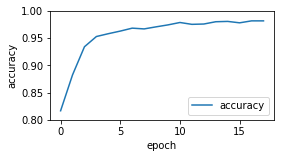

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

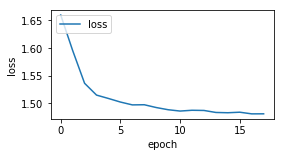

In [20]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

In [22]:
saver = tf.train.Saver()##session()上面
save_path = saver.save(sess, "saveModel/CNN_model1") ##这句话写在session()里面
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN',sess.graph)

In [23]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,"saveModel/CNN_model1")
    y_predict=sess.run(y_predict, feed_dict={x: xxxxx})###做出预测传入要预测的图片xxxxx
    print('test accuracy %g' % accuracy.eval(feed_dict={###打印训练好的模型和测试集相比的准确率
            x: mnist.test.images, y_label: mnist.test.labels, keep_prob: 1.0}))

INFO:tensorflow:Restoring parameters from saveModel/CNN_model1


NameError: name 'xxxxx' is not defined